In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


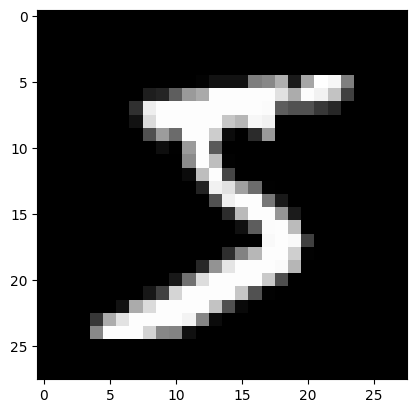

In [5]:
plt.imshow(x_train[0], cmap='gray')  
plt.show() 

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [8]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255  
x_test /= 255

In [9]:
num_classes = 10
y_train = np.eye(num_classes)[y_train]  
y_test = np.eye(num_classes)[y_test]

In [12]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.2)) # DROP OUT RATIO 20%
model.add(Dense(512, activation='relu')) #returns a sequence of vectors of dimen
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',  # for a multi-class classificati
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
batch_size = 128 # batch_size argument is passed to the layer to define a batch 
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # verbose=1 will show you an animated progress ba
             
                    validation_data=(x_test, y_test)) 

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8600 - loss: 0.4506 - val_accuracy: 0.9674 - val_loss: 0.1032
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9672 - loss: 0.1014 - val_accuracy: 0.9719 - val_loss: 0.0857
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9765 - loss: 0.0715 - val_accuracy: 0.9798 - val_loss: 0.0640
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9840 - loss: 0.0505 - val_accuracy: 0.9804 - val_loss: 0.0629
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9851 - loss: 0.0457 - val_accuracy: 0.9777 - val_loss: 0.0745
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9872 - loss: 0.0379 - val_accuracy: 0.9801 - val_loss: 0.0663
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9894 - loss: 0.0323 - val_accuracy: 0.9827 - val_loss: 0.0623
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9921 - loss: 0.0252 - val_acc

In [17]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07678443938493729
Test accuracy: 0.9854000210762024
